# 1. Introduction

In this notebook we are going to deal with a unsupervised learning (learning without teacher) problem for dimensionality reduction called Principal Component Analysis(PCA).

## 1.1 Dimensionality Reduction

The aim of dimensionality reduction is to find the relevant features(retain as much information as possible) from data to reduce dimension which leads to less use of memory and decrease in computation time while training the model. The more number of features leads to increase in model complexity and increases the chance of overfitting.

### 1.1.1 Principal Component Analysis(PCA)
PCA is used to reduce dimension of the data by calculating covariance between features and then calculate feature vectors by calculating the eigen values. The higher the variance the more relevant a feature that is the main idea behind PCA.

# 2. Steps Involved:
    0. Importing the required libraries - for importing all the dependencies.
    1. Making functions of the required steps
    2. Importing dataset
    3. Exploratory Data Analysis (EDA) - for checking the nature and structure of the dataset
    4. Feature Engineering - for getting features from the dataset
    5. Model Building - for building the model (using sklearn)
    6. Model Training - fitting the model for classification
    7. Model Evaluation
    8. Saving the model
    9. Transforming features

# 3. Prerequisites 

## 3.1 Dataset 
breast cancer data has been used as dataset which consist of 14 columns:
    1. alcohol
    2. malic_acid
    3. ash
    4. alcalinity_of_ash
    5. magnesium
    6. total_phenols
    7. flavanoids
    8. nonflavanoid_phenols
    9. proanthocyanins
    10.color_intensity
    11.hue
    12.od280/od315_of_diluted_wines
    13.prolinern
    14.target
    
## 3.2 Libraries Required
    pandas == 0.24.2
    numpy == 1.16.3
    matplotlib == 3.0.3
    seaborn == 0.9.0
    scikit_learn == 0.21.2
    
# 4. Use Case
Some famous use cases of PCA are :
    1. Finding the dominant features from credit card transaction
    2. Customer Segmentation

## Step 0. Importing the required libraries

In [1]:
# Importing dataset from scikit-learn
from sklearn.datasets import load_wine

import pandas as pd
import numpy as np
import pickle

# Data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Step 1. Making functions of the required steps

In [2]:
# FUNCTION FOR CONVERTING THE DATA INTO DATAFRAME
# Input: bunch object
# Output: dataframe

def to_df(wine):
    data = wine['data']
    cols = wine['feature_names']
    df = pd.DataFrame(data, columns=cols)
    
    return df

In [3]:
# FUNCTION FOR PLOTTING HEATMAP OF CORRELATED FEATURES
# Input: dataframe
# Output: heatmap that shows correlation

def plt_heatmap(df):
    sns.heatmap(df.corr(), annot=True, cmap='hot')
    plt.show()

In [4]:
# FUNCTION FOR SAVING THE MODEL
# Input: model object, file name
# Output: pickle file of the model

def save_pickle(model_object, file_name):
    file_pkl = open(file_name, 'wb')
    pickle.dump(model_object, file_pkl)
    file_pkl.close()

In [5]:
# FUNCTION FOR SCALING THE FEATURES
# Input: numpy array of features
# Output: scaled features

def feature_scaling(X):
    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    # Saving the learned scaler model
    save_pickle(sc, 'scaling_model/std_scale_pca.pkl')
    
    return X

In [6]:
# FUNCTION FOR GETTING THE RIGHT NUMBER OF COMPONENTS
# Input: scaled features
# Output: plot that shows variance score at each component

def plt_variance_component(X):
    pca = PCA()
    pca.fit(X)
    
    plt.plot(np.cumsum(pca.explained_variance_ratio_), color='#d3660c', marker='X',
             alpha=0.8, linewidth=2)
    plt.xlabel('Number of Components')
    plt.ylabel('Variance (%)')
    plt.title('Wine Dataset Explained Variance')
    plt.show()

In [7]:
# FUNCTION FOR MODEL BUILDING
# Input: number of components to keep
# Output: model

def build_model(num_components):
    pca = PCA(n_components=num_components, random_state=5)
    return pca

In [8]:
# FUNCTION FOR MODEL TRAINING
# Input: model object and scaled training features
# Output: trained model

def train_model(pca, X):
    pca.fit(X)

In [9]:
# FUNCTION FOR CHECKING THE VARIANCE OF FEATURES
# Input: model object
# Output: bar plot that shows variance of features

def plt_significance(pca):
    features = range(pca.n_components_)
    plt.bar(features, pca.explained_variance_, color='#1100ff', alpha=0.8)
    plt.xlabel('PCA feature')
    plt.ylabel('variance')
    plt.xticks(features)
    plt.show()

In [10]:
# FUNCTION FOR TRANSFORMING DATA
# Input: model object and scaled training features
# Output: transformed features

def transform_feature(pca, X):
    X = pca.transform(X)
    return X

## Step 2. Importing dataset

In [11]:
# Loading data
wine = load_wine()  

wine_df = to_df(wine)

## Step 3. Exploratory Data Analysis

In [12]:
# Checking the structure of data
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [13]:
# Checking the shape of data
# First entry represent the number of rows and second represents columns
wine_df.shape

(178, 13)

In [14]:
# Checking the dataset
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


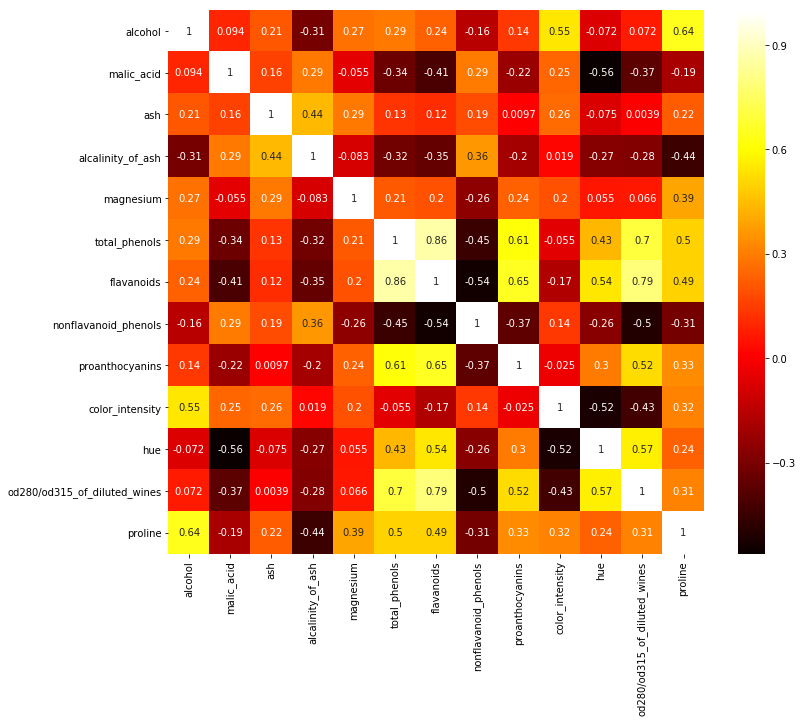

In [15]:
# Plotting heatmap
plt.rcParams["figure.figsize"] = [12, 10]
plt_heatmap(wine_df)

## Step 4. Feature Engineering

In [16]:
# Getting features
X = wine_df.values

In [17]:
# Scaling features
X = feature_scaling(X)

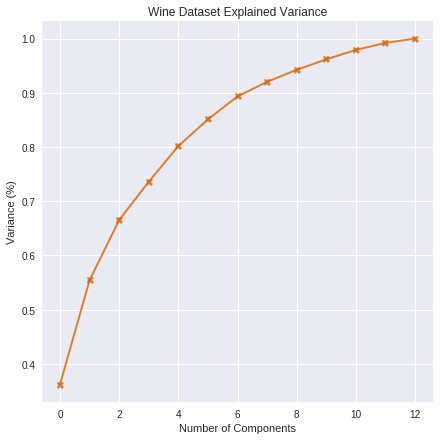

In [18]:
# Variance vs number of components

# Plot style
plt.style.use('seaborn')
# Plot size
plt.rcParams["figure.figsize"] = [7, 7]

plt_variance_component(X)

**`Number of components=10` will be good to keep**

## Step 5. Model Building

In [19]:
# Building the model
pca = build_model(num_components=10)

## Step 6. Model Training

In [20]:
# Training the model
train_model(pca, X)

## Step 7. Model Evaluation

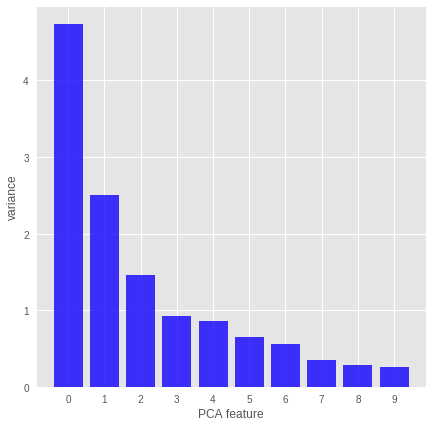

In [21]:
# Plotting the variance of features

# Plot style
plt.style.use('ggplot')
# Plot size
plt.rcParams["figure.figsize"] = [7, 7]

plt_significance(pca)

## Step 8. Saving the model

In [22]:
# Saving pickle of trained model
save_pickle(pca, 'models/pca_wine.pkl')

## Step 9. Transforming features

In [23]:
# Transforming features according to PCA
X = transform_feature(pca, X)